# Working environment

In [1]:
# Librairies
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation
from PIL import Image
from wordcloud import WordCloud
from matplotlib.gridspec import GridSpec

# Text processing
from nltk import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Function for plotting scores
def plot_report(y_true, y_pred, class_names, title = ""):
    fig = plt.figure(figsize = (15,5))
    fig.suptitle(title, fontweight = 'heavy')
    gs = fig.add_gridspec(1,2, width_ratios = [1,2])
    ax1 = fig.add_subplot(gs[1])
    ax2 = fig.add_subplot(gs[0])
    
    # Plot classification report
    report = classification_report(y_true, y_pred, output_dict = True, target_names = class_names)
    df_report = pd.DataFrame(report).iloc[:2,:7]
    acc = round(100*report['accuracy'],1)
    
    df_report.T.plot(kind = 'bar', rot = 30, ax = ax1)
    ax1.set_title('Classification report (accuracy = {}%)'.format(acc), fontweight = 'demibold', fontsize = 10)
    ax1.set_xticklabels(class_names, rotation = 30, horizontalalignment = 'right')
    ax1.grid(True)
    
    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.subplot(ax2)
    sns.heatmap(conf_matrix, cmap = 'RdYlGn', annot = True, square = True, 
                cbar = False, xticklabels = class_names, yticklabels = class_names)
    ax2.set_title('Confusion matrix', fontweight = 'demibold', fontsize = 10)
    ax2.set_xticklabels(class_names, rotation = 30, horizontalalignment = 'right')
    plt.show()

In [3]:
# Loading dataset
data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

# Dropping columns
data_clean = data[['uniq_id', 'product_name', 'product_category_tree', 'image', 'description']].copy()

# Retrieving product category

In [4]:
# Total number of categories
len(data_clean['product_category_tree'].unique())

642

In [5]:
# Splitting product_category_tree
df_categ = data_clean['product_category_tree'].str.split(pat = '>>', expand = True)
df_categ.head(10)

,0,1,2,3,4,5,6
0,"[""Home Furnishing",Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,None,None,None
1,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",None,None
2,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,None,None
3,"[""Home Furnishing",Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,None,None
4,"[""Home Furnishing",Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,None,None
5,"[""Watches",Wrist Watches,"Maserati Time Wrist Watches""]",None,None,None,None
6,"[""Watches",Wrist Watches,"Camerii Wrist Watches""]",None,None,None,None
7,"[""Watches",Wrist Watches,"T STAR Wrist Watches""]",None,None,None,None
8,"[""Watches",Wrist Watches,"Alfajr Wrist Watches""]",None,None,None,None
9,"[""Watches",Wrist Watches,"TAG Heuer Wrist Watches""]",None,None,None,None


In [6]:
# Dropping [] and "" characters
df_categ[0] = df_categ[0].apply(lambda x: str(x)[2:] if str(x)[:2] == '["' else x)

for c in np.arange(0,7,1):
    df_categ[c] = df_categ[c].apply(lambda x: str(x)[:-2] if str(x)[-2:] == '"]' else x)
    
df_categ.head(10)

,0,1,2,3,4,5,6
0,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,None,None,None
1,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",None,None
2,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,None,None
3,Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,None,None
4,Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,None,None
5,Watches,Wrist Watches,Maserati Time Wrist Watches,None,None,None,None
6,Watches,Wrist Watches,Camerii Wrist Watches,None,None,None,None
7,Watches,Wrist Watches,T STAR Wrist Watches,None,None,None,None
8,Watches,Wrist Watches,Alfajr Wrist Watches,None,None,None,None
9,Watches,Wrist Watches,TAG Heuer Wrist Watches,None,None,None,None


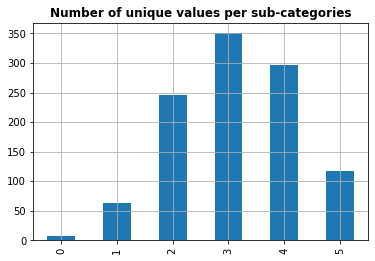

In [7]:
# Number of unique values per category-tree level
df_categ.nunique()[:-1].plot(kind = 'bar')
plt.title("Number of unique values per sub-categories", fontweight = 'bold')
plt.grid(True)
plt.show()

In [8]:
# Principal categories
df_categ[0].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [9]:
# Subcategories
df_categ[1].sort_values().unique()

array([' Baby & Kids Gifts ', ' Baby Bath & Skin ', ' Baby Bedding ',
       ' Baby Grooming ', ' Bar & Glassware ', ' Bath Linen ',
       ' Bath and Spa ', ' Beauty Accessories ', ' Bed Linen ',
       ' Body and Skin Care ', ' Candles & Fragrances ', ' Clocks ',
       ' Coffee Mugs ', ' Combos and Kits ', ' Computer Components ',
       ' Computer Peripherals ', ' Consumables & Disposables ',
       ' Containers & Bottles ', ' Cookware ', ' Curtains & Accessories ',
       ' Cushions, Pillows & Covers ', ' Decorative Lighting & Lamps ',
       ' Diapering & Potty Training ', ' Dinnerware & Crockery ',
       ' Eye Care ', ' Feeding & Nursing ', ' Floor Coverings ',
       ' Flowers, Plants & Vases ', ' Fragrances ',
       ' Furniture & Furnishings ', ' Garden & Leisure ', ' Hair Care ',
       ' Health Care ', ' Housekeeping & Laundry ', ' Infant Wear ',
       ' JMD Home Furnishing ', ' Kitchen & Dining Linen ',
       ' Kitchen Tools ', " Kripa's Home Furnishing ",
       ' Lapt

In [10]:
# Checking whether each category 1 is associated to a single category_0
df_categ.columns = ['categ_'+str(x) for x in df_categ.columns]
df_categ['count'] = 1
s_ = df_categ.pivot_table(index = 'categ_1', columns = 'categ_0', values = 'count').sum(axis = 1)
s_[s_ != 1]

Series([], dtype: float64)

In [11]:
# Joining categ_0 and categ_1 in data_clean
data_clean.drop(columns = 'product_category_tree', inplace = True)
data_clean = data_clean.join(df_categ['categ_0']).copy()
data_clean = data_clean.join(df_categ['categ_1']).copy()
data_clean.rename(columns = {'categ_0' : 'category', 'categ_1' : 'subcategory'}, inplace = True)

# Product description

In [12]:
# Turning text data into 'description-token' matrix
tokenizer = RegexpTokenizer('[a-zA-Z]+')
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')

# Creating tokens and list of words
data_clean['tokens'] = data_clean['description'].apply(lambda x: tokenizer.tokenize(str.lower(x)))
data_clean['words'] = data_clean['tokens'].apply(lambda x: " ".join([stemmer.stem(i) for i in x if i not in stop_words]))

# Count Vectorizer
c_vect = CountVectorizer()
X = c_vect.fit_transform(data_clean['words'])
X.shape

(1050, 4072)

In [13]:
# Feature names
c_vect.get_feature_names()

['aa',
 'aaa',
 'aapno',
 'aari',
 'aarika',
 'abil',
 'abkl',
 'abl',
 'abod',
 'abras',
 'abroad',
 'absolut',
 'absorb',
 'abstract',
 'abstrct',
 'ac',
 'accent',
 'access',
 'accessori',
 'accid',
 'accident',
 'accommod',
 'accomplish',
 'accord',
 'acer',
 'ach',
 'aci',
 'acid',
 'acl',
 'acn',
 'across',
 'acryl',
 'act',
 'activ',
 'actual',
 'ad',
 'adaa',
 'adapt',
 'adaptor',
 'add',
 'addict',
 'addit',
 'adf',
 'adhes',
 'adi',
 'adida',
 'adino',
 'adjust',
 'admir',
 'ador',
 'adorn',
 'adsl',
 'advanc',
 'advic',
 'advis',
 'aero',
 'affect',
 'afford',
 'afternoon',
 'agarwood',
 'age',
 'ageless',
 'agrasen',
 'agre',
 'agromech',
 'aid',
 'air',
 'airport',
 'airtel',
 'airtex',
 'airtight',
 'ajmal',
 'akada',
 'akshaj',
 'akup',
 'al',
 'alarm',
 'alcohol',
 'aleo',
 'alfajr',
 'aliv',
 'alli',
 'allin',
 'allov',
 'allow',
 'alloy',
 'alluminium',
 'allur',
 'almond',
 'almost',
 'alo',
 'aloevera',
 'along',
 'alpha',
 'alphabet',
 'alram',
 'also',
 'alter',
 

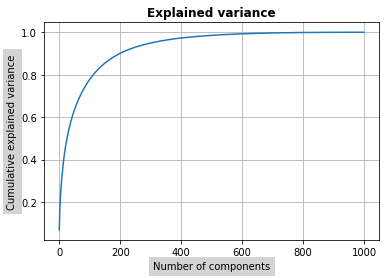

200 components explain 90.0% of variance
303 components explain 95.0% of variance
557 components explain 99.0% of variance


In [14]:
pca = PCA(n_components = 1000)
pca.fit(X.toarray())

# Plotting explained variance
s_ = pca.explained_variance_ratio_.cumsum()
plt.plot(pca.explained_variance_ratio_.cumsum())

plt.title('Explained variance', fontweight = 'bold')
plt.xlabel('Number of components', backgroundcolor = 'lightgrey')
plt.ylabel('Cumulative explained variance', backgroundcolor = 'lightgrey')

plt.grid(True)
plt.show()

# Number of components explaining most of the variance
for val in [0.9, 0.95, 0.99]:
    x = len(s_[s_<val])
    print('{} components explain {}% of variance'.format(x, 100*val))

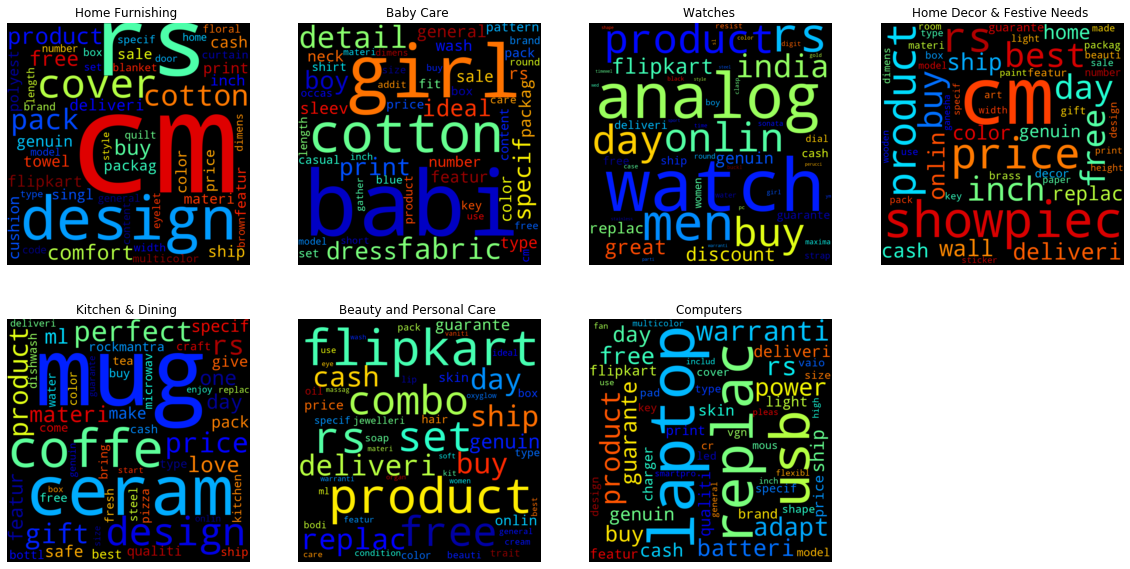

In [15]:
# Drawing wordclouds per category
plt.figure(figsize = (20,10))
categories = data_clean['category'].unique().tolist()

# Wordcloud parameters
w_cloud = WordCloud(width = 800, height = 800, background_color = "black", 
               colormap = 'jet', max_words = 50, collocations = False)

for categ in categories:
    
    # Word collection
    words = " ".join([x for x in data_clean[data_clean['category'] == categ]['words']])
    w_cloud.generate(words)
    
    # Plotting
    plt.subplot(2,4,1+categories.index(categ))
    plt.imshow(w_cloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(categ)
    
plt.show()

# Dimensionnality reduction

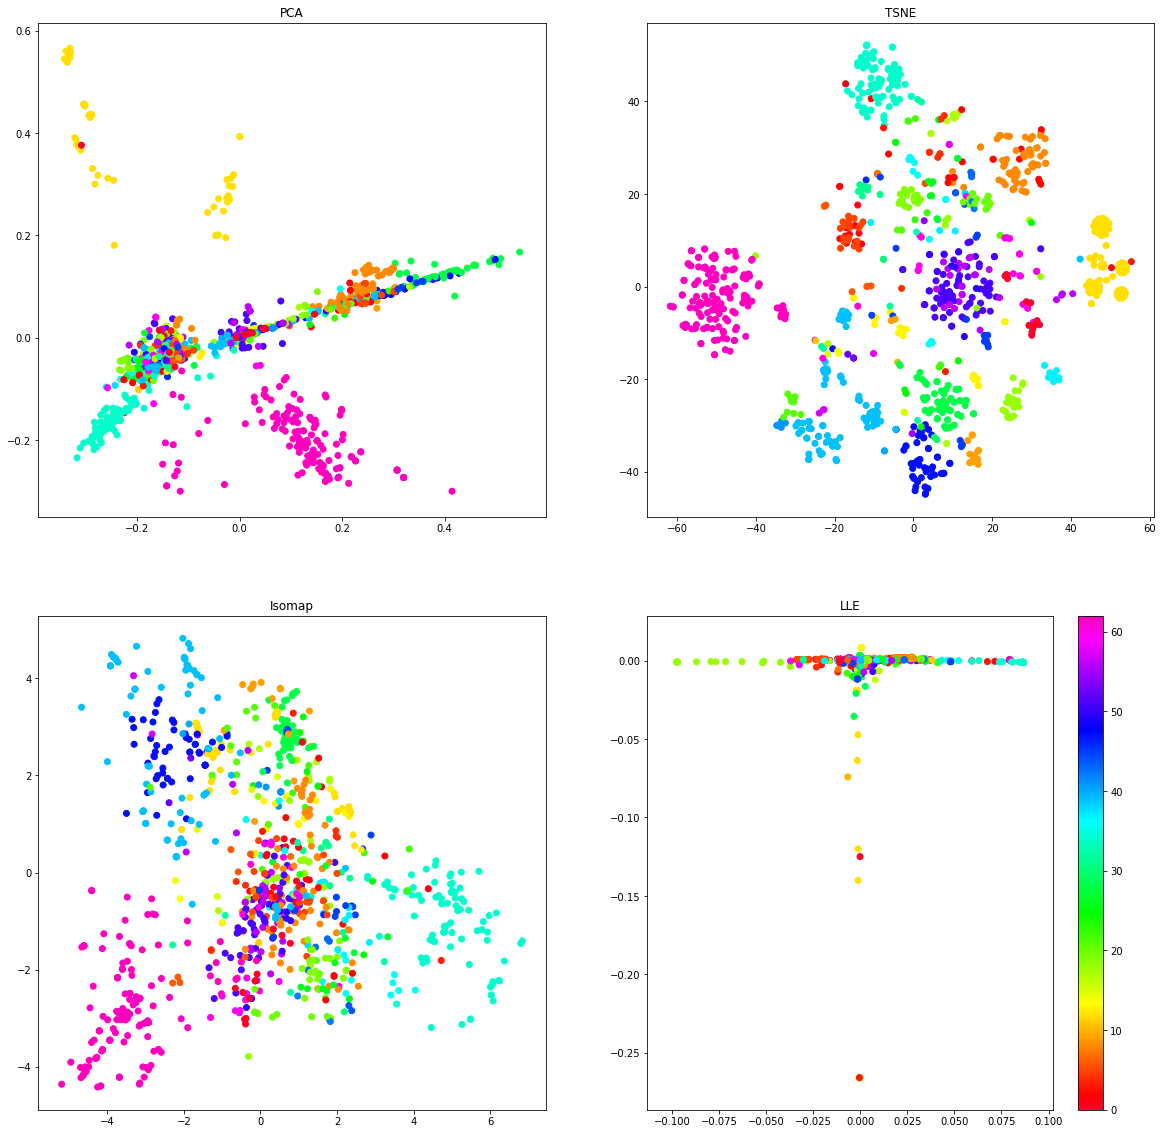

In [16]:
# Creating tf-idf matrix
tf_idf = TfidfTransformer()
X_tfidf = tf_idf.fit_transform(X)

le_subcat = LabelEncoder()
subcats_ = le_subcat.fit_transform(data_clean['subcategory'])

# Fitting Dimensionnlaity reduction algorithms
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)
iso = Isomap(n_components = 2)
lle = LocallyLinearEmbedding(n_components = 2)

X_tf_pca = pca.fit_transform(X_tfidf.toarray())
X_tf_tsne = tsne.fit_transform(X_tfidf)
X_tf_iso = iso.fit_transform(X_tfidf)
X_tf_lle = lle.fit_transform(X_tfidf.toarray())

# Plotting several 2D projections of the tf-idf, and allocating color by subcategory
plt.figure(figsize = (20,20))

plt.subplot(221)
plt.scatter(X_tf_pca[:,0], X_tf_pca[:,1], c = subcats_, cmap = 'gist_rainbow')
plt.title('PCA')

plt.subplot(222)
plt.scatter(X_tf_tsne[:,0], X_tf_tsne[:,1], c = subcats_, cmap = 'gist_rainbow')
plt.title('TSNE')

plt.subplot(223)
plt.scatter(X_tf_iso[:,0], X_tf_iso[:,1], c = subcats_, cmap = 'gist_rainbow')
plt.title('Isomap')

plt.subplot(224)
plt.scatter(X_tf_lle[:,0], X_tf_lle[:,1], c = subcats_, cmap = 'gist_rainbow')
plt.title('LLE')
plt.colorbar()

plt.show()

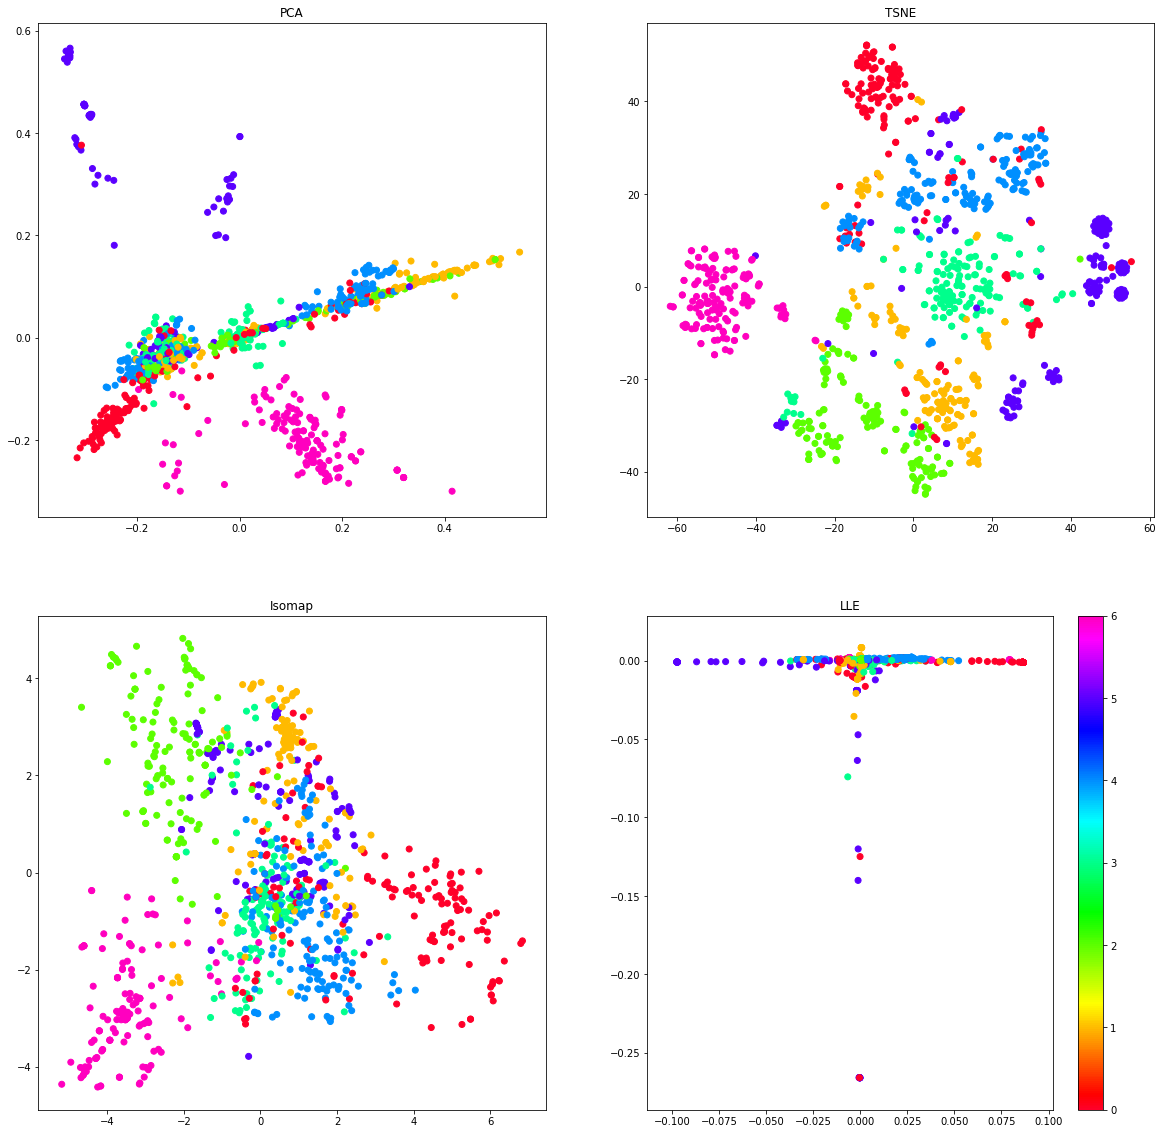

In [17]:
# Plotting with 1 color per main category
le_cat = LabelEncoder()
categs_ = le_cat.fit_transform(data_clean['category'])

plt.figure(figsize = (20,20))

plt.subplot(221)
plt.scatter(X_tf_pca[:,0], X_tf_pca[:,1], c = categs_, cmap = 'gist_rainbow')
plt.title('PCA')

plt.subplot(222)
plt.scatter(X_tf_tsne[:,0], X_tf_tsne[:,1], c = categs_, cmap = 'gist_rainbow')
plt.title('TSNE')

plt.subplot(223)
plt.scatter(X_tf_iso[:,0], X_tf_iso[:,1], c = categs_, cmap = 'gist_rainbow')
plt.title('Isomap')

plt.subplot(224)
plt.scatter(X_tf_lle[:,0], X_tf_lle[:,1], c = categs_, cmap = 'gist_rainbow')
plt.title('LLE')
plt.colorbar()

plt.show()

# Naive Bayes classification

## Bernoulli Naive Bayes

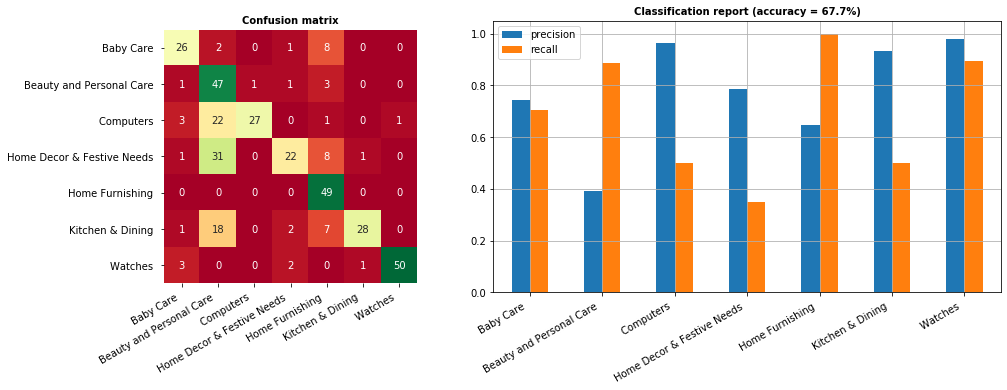

In [18]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data_clean['category'], test_size = 0.35)

# Traning a Bayes classifier
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)

# Prediction and scoring
y_bern_pred = bernoulli.predict(X_test) 
plot_report(y_test, y_bern_pred, class_names = data_clean['category'].sort_values().unique())

In [19]:
# Finding main keywords per category
df_fi = pd.DataFrame(np.exp(bernoulli.feature_log_prob_), 
             index = bernoulli.classes_,
             columns = c_vect.get_feature_names()
            ).T

df_top = pd.DataFrame(columns = bernoulli.classes_)
for categ in df_fi.columns:
    s_ = df_fi[categ]
    df_top[categ] = s_.sort_values(ascending = False).head(10).index
    
df_top

,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
0,specif,rs,rs,price,rs,rs,watch
1,general,product,product,rs,product,price,rs
2,ideal,free,free,cm,free,product,cash
3,rs,day,replac,showpiec,buy,ceram,buy
4,babi,replac,day,product,flipkart,mug,flipkart
5,cotton,deliveri,buy,free,com,day,guarante
6,fabric,cash,guarante,best,ship,materi,free
7,sale,guarante,cash,deliveri,genuin,gift,onlin
8,number,genuin,genuin,day,cash,design,deliveri
9,packag,buy,ship,onlin,deliveri,love,replac


## Multinomial Naive Bayes

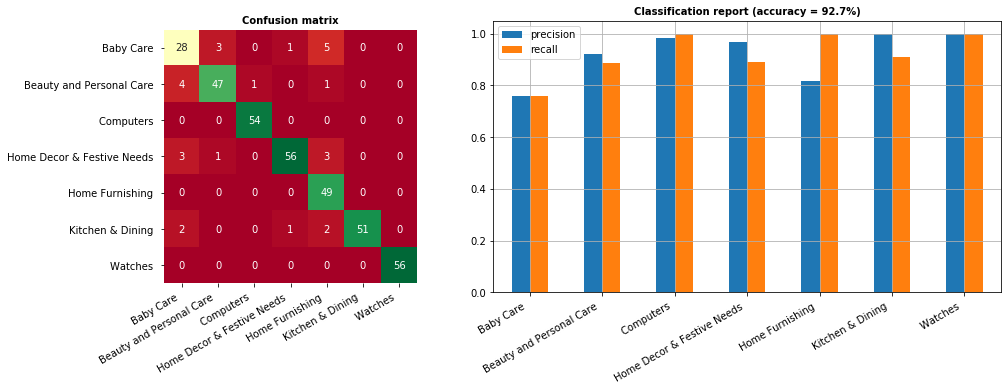

In [20]:
# Training
from sklearn.naive_bayes import MultinomialNB
bernoulli = MultinomialNB()
bernoulli.fit(X_train, y_train)

# Prediction and scoring
y_bern_pred = bernoulli.predict(X_test) 
plot_report(y_test, y_bern_pred, class_names = data_clean['category'].sort_values().unique())

In [21]:
# Finding main keywords per category
df_fi = pd.DataFrame(np.exp(bernoulli.feature_log_prob_), 
             index = bernoulli.classes_,
             columns = c_vect.get_feature_names()
            ).T

df_top = pd.DataFrame(columns = bernoulli.classes_)
for categ in df_fi.columns:
    s_ = df_fi[categ]
    df_top[categ] = s_.sort_values(ascending = False).head(10).index
    
df_top

,Baby Care,Beauty and Personal Care,Computers,Home Decor & Festive Needs,Home Furnishing,Kitchen & Dining,Watches
0,babi,com,laptop,showpiec,com,mug,watch
1,girl,flipkart,usb,cm,flipkart,ceram,analog
2,cotton,combo,replac,best,cm,coffe,men
3,detail,set,guarante,price,quilt,kadhai,discount
4,fabric,guarante,com,wall,doubl,perfect,women
5,dress,replac,flipkart,onlin,cushion,gift,india
6,boy,day,day,buddha,comfort,rockmantra,great
7,neck,product,free,decor,genuin,one,dial
8,sleev,onlin,genuin,product,cash,love,com
9,print,deliveri,cash,guarante,ship,design,onlin


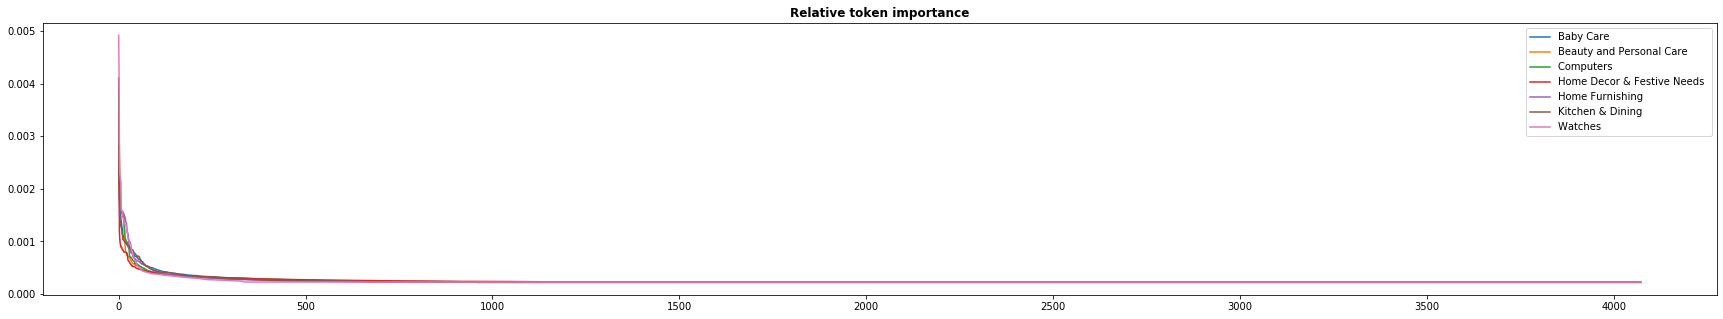

In [22]:
# Token importance
plt.figure(figsize = (30,5))
for categ in df_fi.columns:
    plt.plot(range(df_fi.shape[0]), df_fi[categ].sort_values(ascending = False).values, label = categ)
    plt.legend()
plt.title('Relative token importance', fontweight = 'bold')
plt.show()

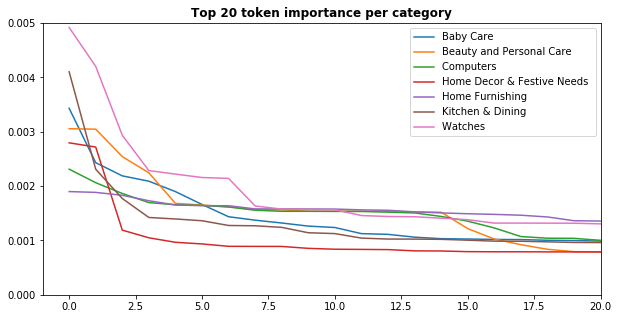

In [23]:
# First token importance
plt.figure(figsize = (10,5))
for categ in df_fi.columns:
    plt.plot(range(df_fi.shape[0]), df_fi[categ].sort_values(ascending = False).values, label = categ)
    plt.legend()
    
plt.xlim(-1,20)
plt.ylim(0,0.005)
plt.title('Top 20 token importance per category', fontweight = 'bold')
plt.show()

## Export

In [24]:
# Dataset containing probabilities to belong to each category given a text
df_pred_text = data_clean[['image', 'category', 'subcategory']].copy()

df_pred_text = df_pred_text.join(
    pd.DataFrame(bernoulli.predict_proba(X_tfidf),
                 columns = ['p(C{}|text)'.format(x) for x in range(7)]))

df_pred_text['txt_prediction'] = df_pred_text.iloc[:,3:].values.argmax(axis=1)
df_pred_text

,image,category,subcategory,p(C0|text),p(C1|text),p(C2|text),p(C3|text),p(C4|text),p(C5|text),p(C6|text),txt_prediction
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,Curtains & Accessories,0.038299,0.014444,0.014833,0.030640,0.860159,0.033135,0.008491,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,Baby Bath & Skin,0.538920,0.016717,0.013655,0.022467,0.376923,0.015688,0.015630,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,Baby Bath & Skin,0.588788,0.047329,0.022249,0.033695,0.264103,0.029179,0.014657,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,Bed Linen,0.263157,0.014345,0.020577,0.046495,0.626307,0.018439,0.010680,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,Bed Linen,0.202789,0.012024,0.018974,0.039147,0.703572,0.016314,0.007180,4
...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,Baby & Kids Gifts,0.182890,0.080888,0.095311,0.397528,0.088478,0.099074,0.055832,3
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,Baby & Kids Gifts,0.286328,0.050006,0.085153,0.303312,0.118884,0.124797,0.031521,3
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,Baby & Kids Gifts,0.374077,0.127858,0.112851,0.117478,0.078668,0.091974,0.097095,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,Baby & Kids Gifts,0.494771,0.090294,0.085368,0.140399,0.051787,0.071659,0.065722,0


In [25]:
# Storing
df_pred_text.to_pickle('df_pred_text.pkl')